In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
from  google.colab import files
upload=files.upload()

Saving weather_prediction_bbq_labels.csv to weather_prediction_bbq_labels.csv
Saving weather_prediction_dataset.csv to weather_prediction_dataset.csv


In [ ]:
df = pd.read_csv('/content/weather_prediction_dataset.csv')
df_bbq = pd.read_csv('/content/weather_prediction_bbq_labels.csv')

In [ ]:
df.head(6)

,DATE,MONTH,BASEL_cloud_cover,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,BASEL_sunshine,BASEL_temp_mean,BASEL_temp_min,...,STOCKHOLM_temp_min,STOCKHOLM_temp_max,TOURS_wind_speed,TOURS_humidity,TOURS_pressure,TOURS_global_radiation,TOURS_precipitation,TOURS_temp_mean,TOURS_temp_min,TOURS_temp_max
0,20000101,1,8,0.89,1.0286,0.20,0.03,0.0,2.9,1.6,...,-9.3,0.7,1.6,0.97,1.0275,0.25,0.04,8.5,7.2,9.8
1,20000102,1,8,0.87,1.0318,0.25,0.00,0.0,3.6,2.7,...,0.5,2.0,2.0,0.99,1.0293,0.17,0.16,7.9,6.6,9.2
2,20000103,1,5,0.81,1.0314,0.50,0.00,3.7,2.2,0.1,...,-1.0,2.8,3.4,0.91,1.0267,0.27,0.00,8.1,6.6,9.6
3,20000104,1,7,0.79,1.0262,0.63,0.35,6.9,3.9,0.5,...,2.5,4.6,4.9,0.95,1.0222,0.11,0.44,8.6,6.4,10.8
4,20000105,1,5,0.90,1.0246,0.51,0.07,3.7,6.0,3.8,...,-1.8,2.9,3.6,0.95,1.0209,0.39,0.04,8.0,6.4,9.5
5,20000106,1,3,0.85,1.0244,0.56,0.00,5.7,4.2,1.9,...,-0.6,4.0,3.4,0.92,1.0209,0.55,0.20,7.1,3.5,10.7


In [ ]:
df_bbq.head(6)

,DATE,BASEL_BBQ_weather,BUDAPEST_BBQ_weather,DE_BBQ_weather,DRESDEN_BBQ_weather,DUSSELDORF_BBQ_weather,HEATHROW_BBQ_weather,KASSEL_BBQ_weather,LJUBLJANA_BBQ_weather,MAASTRICHT_BBQ_weather,MALMO_BBQ_weather,MONTELIMAR_BBQ_weather,MUENCHEN_BBQ_weather,OSLO_BBQ_weather,PERPIGNAN_BBQ_weather,SONNBLICK_BBQ_weather,STOCKHOLM_BBQ_weather,TOURS_BBQ_weather
0,20000101,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,20000102,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,20000103,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,20000104,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,20000105,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
5,20000106,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
len(df_bbq.columns), df_bbq.columns ## display total number of columns and names

(18,
 Index(['DATE', 'BASEL_BBQ_weather', 'BUDAPEST_BBQ_weather', 'DE_BBQ_weather',
        'DRESDEN_BBQ_weather', 'DUSSELDORF_BBQ_weather', 'HEATHROW_BBQ_weather',
        'KASSEL_BBQ_weather', 'LJUBLJANA_BBQ_weather', 'MAASTRICHT_BBQ_weather',
        'MALMO_BBQ_weather', 'MONTELIMAR_BBQ_weather', 'MUENCHEN_BBQ_weather',
        'OSLO_BBQ_weather', 'PERPIGNAN_BBQ_weather', 'SONNBLICK_BBQ_weather',
        'STOCKHOLM_BBQ_weather', 'TOURS_BBQ_weather'],
       dtype='object'))

In [ ]:
df.columns

Index(['DATE', 'MONTH', 'BASEL_cloud_cover', 'BASEL_humidity',
       'BASEL_pressure', 'BASEL_global_radiation', 'BASEL_precipitation',
       'BASEL_sunshine', 'BASEL_temp_mean', 'BASEL_temp_min',
       ...
       'STOCKHOLM_temp_min', 'STOCKHOLM_temp_max', 'TOURS_wind_speed',
       'TOURS_humidity', 'TOURS_pressure', 'TOURS_global_radiation',
       'TOURS_precipitation', 'TOURS_temp_mean', 'TOURS_temp_min',
       'TOURS_temp_max'],
      dtype='object', length=165)

For each of the 18 cities in Europe, there are 165 columns. A variety of data were recorded for each city, including wind speed, gust, cloud cover, humidity, pressure, global radiation, precipitation, sunshine, minimum and maximum temperatures. Moreover, the collection of data differs from city to city (for instance, wind speed may be substituted for cloud cover in certain cities, or wind gust may be substituted for wind speed in others).

Dresden, a city in eastern Germany, will be the subject of this diary.

This is to forecast when the weather will be suitable for an outdoor BBQ.

## Dresden Weather


In [ ]:
## column names from index 30 to 40 in the dataset
df.columns[30:41]

Index(['DRESDEN_cloud_cover', 'DRESDEN_wind_speed', 'DRESDEN_wind_gust',
       'DRESDEN_humidity', 'DRESDEN_global_radiation', 'DRESDEN_precipitation',
       'DRESDEN_sunshine', 'DRESDEN_temp_mean', 'DRESDEN_temp_min',
       'DRESDEN_temp_max', 'DUSSELDORF_cloud_cover'],
      dtype='object')

In [ ]:
## creates a new DataFrame called df_Dresden by selecting specific columns from df
df_Dresden = df[['DATE', 'DRESDEN_cloud_cover', 'DRESDEN_wind_speed', 'DRESDEN_wind_gust',
       'DRESDEN_humidity', 'DRESDEN_global_radiation', 'DRESDEN_precipitation',
       'DRESDEN_sunshine', 'DRESDEN_temp_mean', 'DRESDEN_temp_min',
       'DRESDEN_temp_max']]

In [ ]:
## Combines Dresden's weather data with BBQ suitability
df_Dresden = df_Dresden.copy()
df_Dresden['BBQ'] = df_bbq['DRESDEN_BBQ_weather']


In [ ]:
df_Dresden.head()

,DATE,DRESDEN_cloud_cover,DRESDEN_wind_speed,DRESDEN_wind_gust,DRESDEN_humidity,DRESDEN_global_radiation,DRESDEN_precipitation,DRESDEN_sunshine,DRESDEN_temp_mean,DRESDEN_temp_min,DRESDEN_temp_max,BBQ
0,20000101,8,3.2,7.2,0.89,0.09,0.32,0.0,1.0,-1.8,2.0,False
1,20000102,7,4.0,8.8,0.89,0.23,0.00,0.4,2.5,1.4,4.0,False
2,20000103,7,5.4,12.1,0.79,0.18,0.00,0.0,4.2,1.3,5.1,False
3,20000104,8,6.0,14.4,0.88,0.11,0.22,0.0,4.4,3.4,5.2,False
4,20000105,2,5.6,15.8,0.76,0.49,0.00,5.7,1.8,-0.5,6.9,False


## Data Visualization


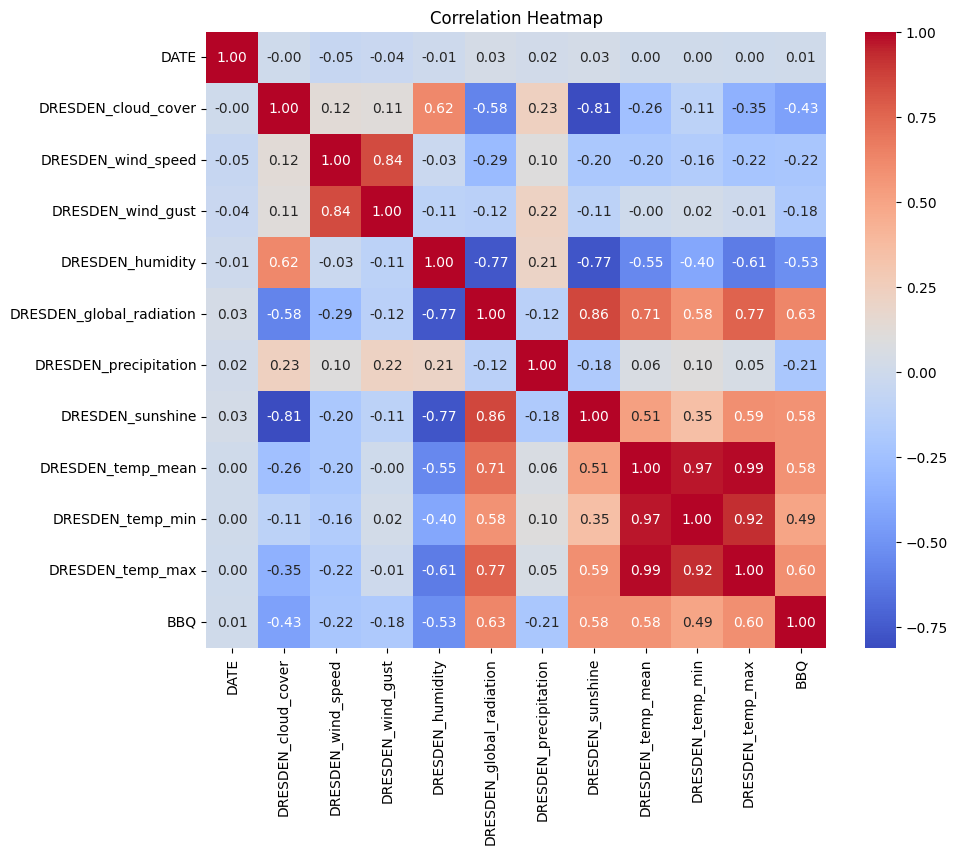

In [ ]:
##  creates a correlation heatmap for the df_Dresden
plt.figure(figsize=(10, 8))
sns.heatmap(df_Dresden.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

## Observation from output
1.BBQ-friendly weather depends on:

- More sunshine & high temperature (positive correlation).
- Less cloud cover & low humidity (negative correlation).
2.Best weather for BBQ:

- Sunny, warm, and dry days.
3.Bad weather for BBQ:

- Cloudy, humid, and rainy days.

## BBQ Occurance Countplot

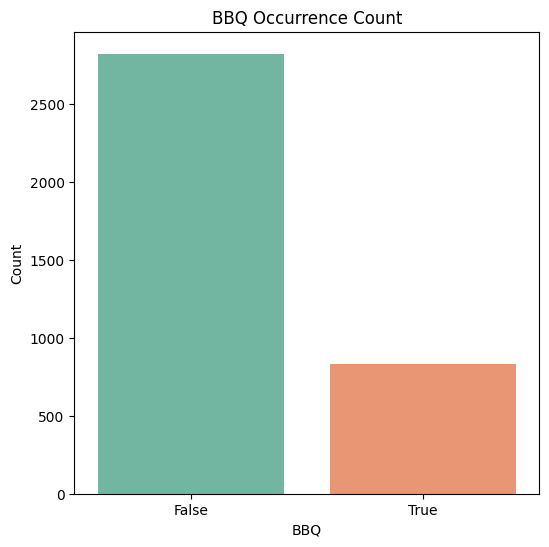

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6, 6))
sns.countplot(data=df_Dresden, x='BBQ', hue='BBQ', palette='Set2', legend=False)
plt.title('BBQ Occurrence Count')
plt.xlabel('BBQ')
plt.ylabel('Count')
plt.show()


## Observations from the Output:
1.More 'False' than 'True':

- Most days are not BBQ-friendly.
This means bad weather (cloudy, rainy, humid) is more common.
2.Fewer 'True' (BBQ-friendly) days:

- Only a small number of days have perfect weather for BBQ.

Subplots

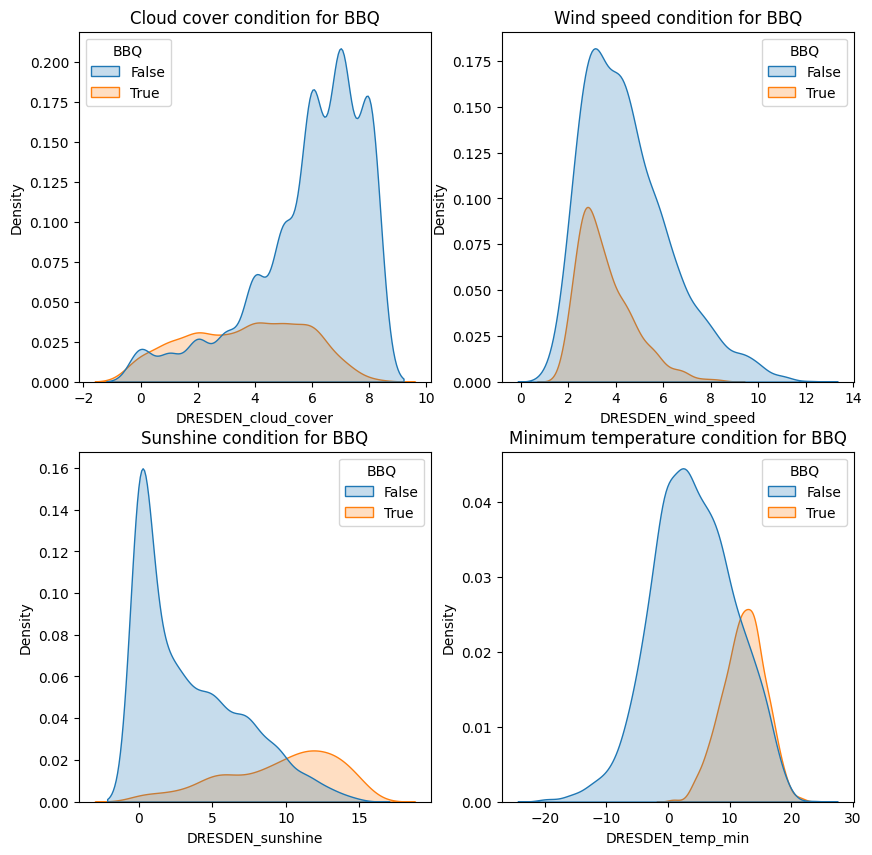

In [ ]:
fig, axs = plt.subplots(2,2, figsize = (10,10))
sns.kdeplot(data = df_Dresden, x='DRESDEN_cloud_cover', hue = 'BBQ', fill = True, ax = axs[0,0])
axs[0,0].set_title('Cloud cover condition for BBQ')
sns.kdeplot(data = df_Dresden, x='DRESDEN_wind_speed', hue = 'BBQ', fill = True, ax = axs[0,1])
axs[0,1].set_title('Wind speed condition for BBQ')
sns.kdeplot(data = df_Dresden, x='DRESDEN_sunshine', hue = 'BBQ', fill = True, ax = axs[1,0])
axs[1,0].set_title('Sunshine condition for BBQ')
sns.kdeplot(data = df_Dresden, x='DRESDEN_temp_min', hue = 'BBQ', fill = True, ax = axs[1,1])
axs[1,1].set_title('Minimum temperature condition for BBQ')

plt.show()

## Observations from the Output:
BBQ days have lower cloud cover.
BBQ days have moderate wind speeds.
Higher sunshine is linked to BBQ days.
BBQ-friendly days tend to have higher minimum temperatures.

INTERPRETATIONS:

Cloud Cover Density: Points to a greater chance of less cloud cover when grilling in Dresden.

Wind Speed Density: This indicates that Dresden would be a good place to barbecue because it peaks at lower wind speeds.

Sunshine Density: Shows a greater likelihood of mild sunshine, which is perfect for Dresden barbecues.

Minimum Temperature Density: This shows a peak at relatively low minimum temperatures, which is ideal for Dresden barbecues.

<ipython-input-16-97f601af0f38>:16: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data=df_Dresden, x='DRESDEN_precipitation', hue='BBQ', fill=True, ax=axs[1, 0])


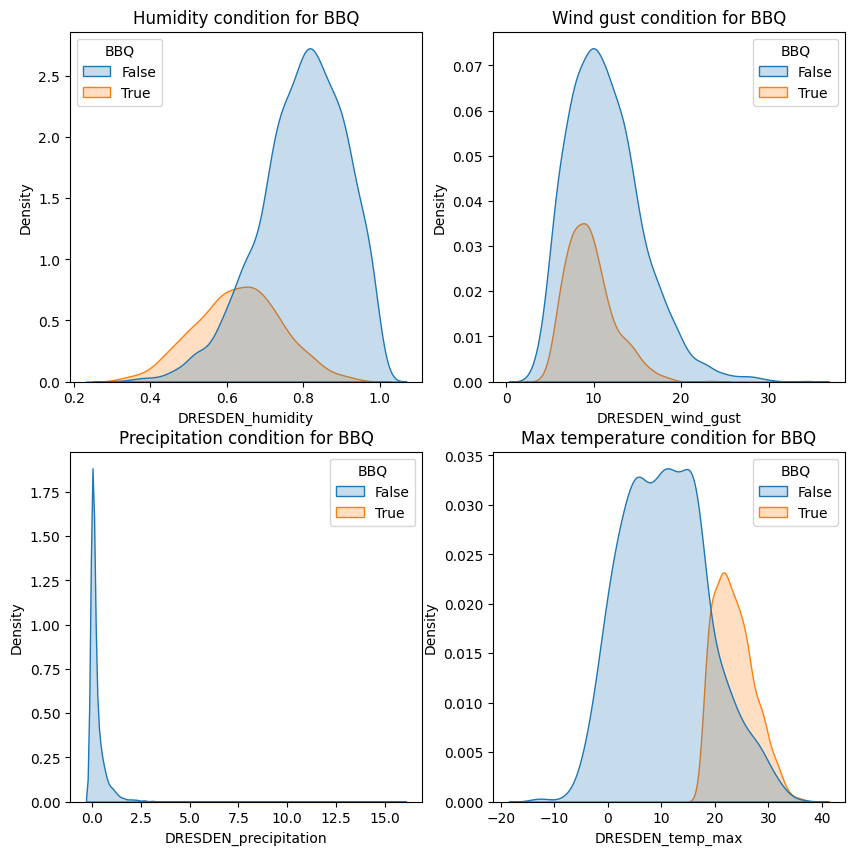

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axs = plt.subplots(2, 2, figsize=(10, 10))

# Humidity
sns.kdeplot(data=df_Dresden, x='DRESDEN_humidity', hue='BBQ', fill=True, ax=axs[0, 0])
axs[0, 0].set_title('Humidity condition for BBQ')

# Wind Gust
sns.kdeplot(data=df_Dresden, x='DRESDEN_wind_gust', hue='BBQ', fill=True, ax=axs[0, 1])
axs[0, 1].set_title('Wind gust condition for BBQ')

# Precipitation - Check variance first
if df_Dresden['DRESDEN_precipitation'].nunique() > 1:
    sns.kdeplot(data=df_Dresden, x='DRESDEN_precipitation', hue='BBQ', fill=True, ax=axs[1, 0])
else:
    sns.histplot(data=df_Dresden, x='DRESDEN_precipitation', hue='BBQ', kde=False, ax=axs[1, 0])
axs[1, 0].set_title('Precipitation condition for BBQ')

# Max Temperature
sns.kdeplot(data=df_Dresden, x='DRESDEN_temp_max', hue='BBQ', fill=True, ax=axs[1, 1])
axs[1, 1].set_title('Max temperature condition for BBQ')

plt.show()


## INTERPRETATIONS:

Precipitation Density: Shows a greater chance of less precipitation when grilling in Dresden.

Humidity Density: Indicates ideal BBQ weather in Dresden, with a peak at moderate humidity levels.

Wind Gust Density: Shows a greater likelihood of calmer wind gusts, which is perfect for Dresden barbecues.

Maximum Temperature Density: Shows a peak at relatively high temperatures, which is ideal for Dresden barbecues.

Distribution plots¶

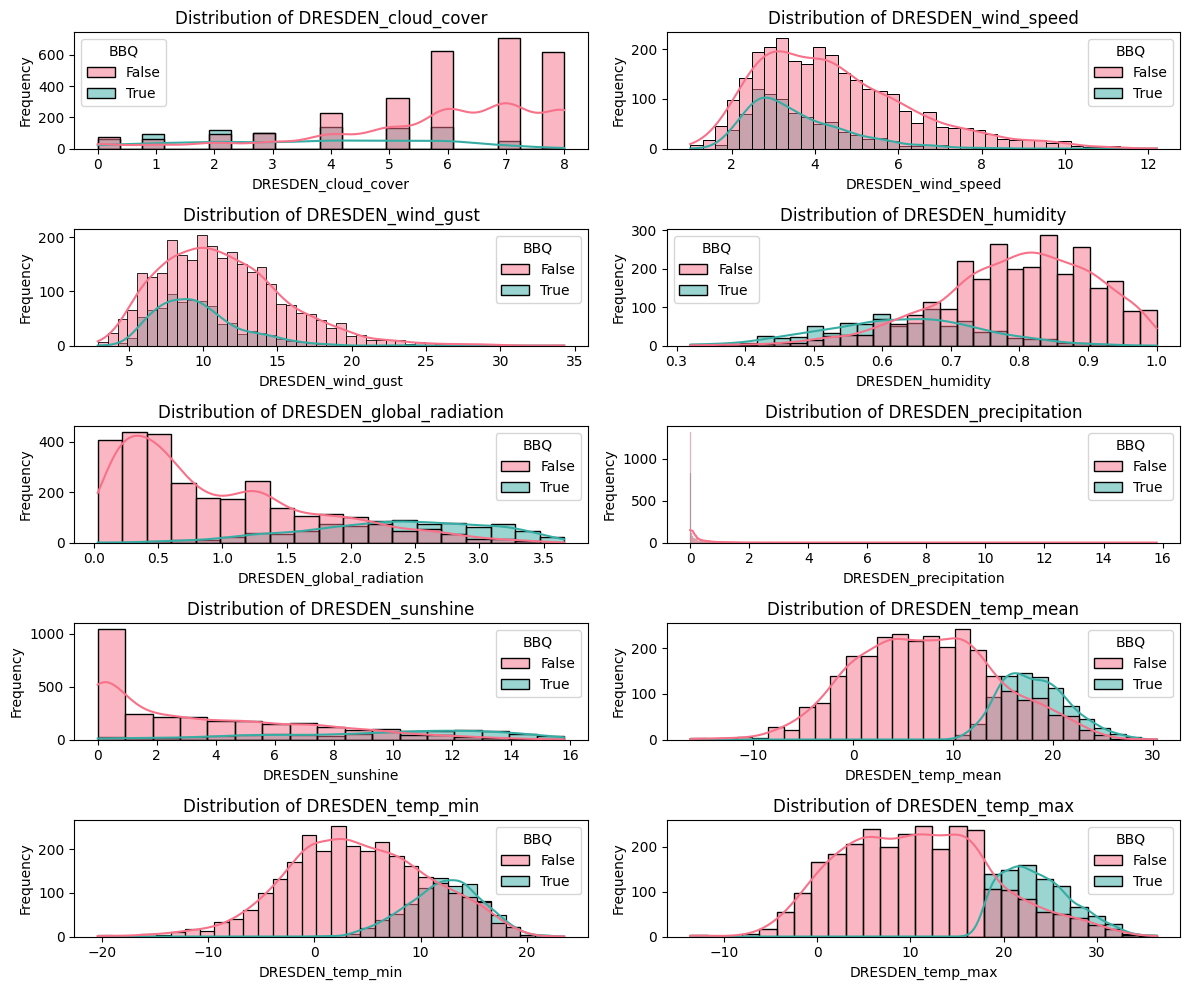

In [ ]:
## visualize the distribution of various weather variables and their relationship with BBQ days (True/False).The goal is to see how different weather factors influence BBQ events.
# Distribution plots for weather variables
plt.figure(figsize=(12, 10))
plt.subplots_adjust(hspace=0.5)

variables = ['DRESDEN_cloud_cover', 'DRESDEN_wind_speed', 'DRESDEN_wind_gust',
             'DRESDEN_humidity', 'DRESDEN_global_radiation', 'DRESDEN_precipitation',
             'DRESDEN_sunshine', 'DRESDEN_temp_mean', 'DRESDEN_temp_min', 'DRESDEN_temp_max']

for i, var in enumerate(variables, 1):
    plt.subplot(5, 2, i)
    sns.histplot(data=df_Dresden, x=var, kde=True, hue='BBQ', palette='husl')
    plt.title(f'Distribution of {var}')
    plt.xlabel(var)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

## Observations from the Output:
Cloud Cover (DRESDEN_cloud_cover):

BBQ days mostly occur when cloud cover is low.
Non-BBQ days have a higher frequency of high cloud cover.
Wind Speed (DRESDEN_wind_speed) & Wind Gust (DRESDEN_wind_gust):

BBQ days tend to have lower wind speeds.
Strong wind gusts are more frequent on non-BBQ days.
Humidity (DRESDEN_humidity):

BBQ days tend to have lower humidity levels.
Higher humidity correlates with fewer BBQ days.
Global Radiation (DRESDEN_global_radiation):

BBQ days have slightly higher global radiation (sunlight intensity).
More sunlight favors BBQ events.
Precipitation (DRESDEN_precipitation):

BBQ days have almost zero precipitation.
Rainy days are strongly associated with non-BBQ days.
Sunshine (DRESDEN_sunshine):

BBQ days are associated with more sunshine.
Non-BBQ days have more occurrences of low sunshine levels.
Temperature (Mean, Min, Max):

Higher temperatures (mean, min, and max) are associated with BBQ days.
BBQ days occur mostly when temperatures are moderate to warm.
Conclusion:
Ideal BBQ Weather:
Low cloud cover, low wind, low humidity, no rain, more sunshine, and warmer temperatures.
Non-BBQ Weather:
High cloud cover, strong wind, high humidity, rain, and colder temperatures.

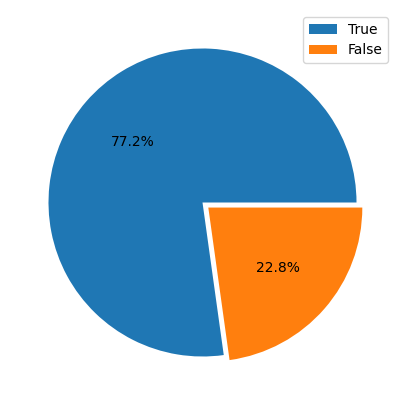

In [ ]:
## a pie chart showing the proportion of BBQ-friendly days (True) vs. non-BBQ-friendly days (False) based on the dataset
#True vs False: condition for having a nice weather
plt.figure(figsize = (5,5))
explode = [0,0.05]
plt.pie(df_Dresden['BBQ'].value_counts(),
        explode=explode, autopct='%.1f%%');
plt.legend(['True', 'False']);
plt.show()

## Observations from the Pie Chart:
77.2% BBQ-Friendly Days (True)
The majority of days (around 77%) have favorable weather for BBQ.
22.8% Non-BBQ Days (False)
Only around 23% of the days have unfavorable weather conditions.